## Pandas数据预处理

In [2]:
import numpy as np
import pandas as pd


如何对数据进行预处理，提高数据质量，是数据分析工作中常见而且非常重要的问题。

### 主要内容：

+ 数据合并
+ 数据清洗
+ 数据标准化
+ 数据转换

### 1、数据合并:
横向或者纵向堆叠合并数据、主键合并数据、重叠合并数据

#### 1.1、堆叠合并：

就是简单的把两个表拼在一起，也称为轴向连接、绑定或连接。根据连接轴的方向，分为横向堆叠和纵向堆叠

```python
pd.concat(objs, axis=0, join='outer', join_axes=None.....)
```

注：append方法也可以用于纵向合并两张表。但是append方法实现纵向表堆叠有一个前提条件，那就是两张表的列名需要完全一致。append方法的基本语法如下：
pandas.DataFrame.append(self, other, ignore_index=False, verify_integrity=False)。

#### 1.2 主键合并

通过一个或多个键将两个数据集的行连接起来。针对同一个主键存在两张包含不同字段的表，将其根据某几个字段一一对应拼接起来，结果集列数为两个元数据的列数和减去连接键的数量。

主键合并——merge函数

```python
pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, 
suffixes=('_x', '_y'), copy=True, indicator=False)
```

具体见pandas数据分析二

#### 1.3、重叠合并数据

数据分析和处理过程中若出现两份数据的内容几乎一致的情况，但是某些特征在其中一张表上是完整的，而在另外一张表上的数据则是缺失的时候，可以用combine_first方法进行重叠数据合并，其原理如下。

```python
pandas.DataFrame.combine_first(other)
```

In [18]:
# 建立两个字典，除了ID外，别的特征互补
dict1 = {'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9],
         'System': ['win10', 'win10', np.nan, 'win10',
                    np.nan, np.nan, 'win7', 'win7', 'win8'],
         'cpu': ['i7', 'i5', np.nan, 'i7', np.nan, np.nan, 'i5', 'i5', 'i3']}

dict2 = {'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9],
         'System': [np.nan, np.nan, 'win7', np.nan,
                    'win8', 'win7', np.nan, np.nan, np.nan],
         'cpu': [np.nan, np.nan, 'i3', np.nan, 'i7',
                 'i5', np.nan, np.nan, np.nan]}
# 转换两个字典为DataFrame
df5 = pd.DataFrame(dict1)
df6 = pd.DataFrame(dict2)
df5.set_index("ID", inplace=True)
df6.set_index("ID", inplace=True)
print('df5是：\n', df5)
print('df6是：\n', df6)


df5是：
    System  cpu
ID            
1   win10   i7
2   win10   i5
3     NaN  NaN
4   win10   i7
5     NaN  NaN
6     NaN  NaN
7    win7   i5
8    win7   i5
9    win8   i3
df6是：
    System  cpu
ID            
1     NaN  NaN
2     NaN  NaN
3    win7   i3
4     NaN  NaN
5    win8   i7
6    win7   i5
7     NaN  NaN
8     NaN  NaN
9     NaN  NaN


In [19]:
print('经过重叠合并后的数据为：\n', df5.combine_first(df6))


经过重叠合并后的数据为：
    System cpu
ID           
1   win10  i7
2   win10  i5
3    win7  i3
4   win10  i7
5    win8  i7
6    win7  i5
7    win7  i5
8    win7  i5
9    win8  i3


#### 2、数据清洗

   数据重复会导致数据的方差变小，数据分布发生较大变化；缺失会导致样本信息减少，不仅增加了数据分析难度，也会导致数据分析的结果产生较大偏差；异常值会产生“伪回归”，也会对数据分析的结果产生较大影响。因此，需要对数据进行检测，查询是否有重复数据，缺失值和异常值，并要对这些数据进行适当处理。

* 重复值的检测和处理
+ 缺失值的检测和处理
- 异常值的检测和处理

#### 2.1、检测和处理重复值 

1）记录重复:例如下面菜品订单详情表中的dlishe_name特征存放了每个订单的彩票，要找出所有已点的菜品，最简单的方法就是利用去重操作去实现。

In [ ]:
detail


In [32]:
# 方法1、利用list代码去重
def delRep(list1):
    list2 = []
    for i in list1:
        if i not in list2:
            list2.append(i)
    return list2


In [ ]:
# 应用
dishes = list(detail['dishes_name'])
print('去重前的菜品总数为：', len(dishes))
dish = delRep(dishes)
print('去重后的菜品总数为：', len(dish))
print(dish)


In [ ]:
# 方法2：利用集合set的无重复性去重
print('去重前的菜品总数为：', len(dishes))
dish_set = set(dishes)
print('去重后的菜品总数为：', len(dish_set))
print(dish_set)


##### 方法3 drop_duplicates函数
调用方法：
```python 
pandas.DataFrame(Series).drop_duplicates(self,
subset=None,keep='first',inplace=False)
```

In [36]:
dish_name = detail['dishes_name'].drop_duplicates()
print('去重后的菜品总数为：', len(dish_name))
print(dish_name)


去重后的菜品总数为： 145
detail_id
2956          蒜蓉生蚝
2958         蒙古烤羊腿
2961          大蒜苋菜
2966         芝麻烤紫菜
2968           蒜香包
           ...    
7064        海带结豆腐汤
4683          冰镇花螺
4115         冬瓜炒苦瓜
7168       超人气广式肠粉
858     百里香奶油烤紅酒牛肉
Name: dishes_name, Length: 145, dtype: object


2)特征重复：对于连续特征，如果两连续特征的相似度为1，则认为两特征重复，可以去掉一个。相似度可以用相关系数corr来度量。例如菜品订单数据中的销量和售价

In [37]:
# 求取销量和售价的相似度
corrDet = detail[['counts', 'amounts']].corr(method='kendall')
print('销量和售价的kendall相似度为：\n', corrDet)


销量和售价的kendall相似度为：
            counts   amounts
counts   1.000000 -0.229968
amounts -0.229968  1.000000


利用DataFrame.equal函数去重

#### 2.2、缺失值的检测和处理

1)缺失值检测：isnull和notnull

In [38]:
# 代码 5-17
print('detail每个特征缺失的数目为：\n', detail.isnull().sum())
print('detail每个特征非缺失的数目为：\n', detail.notnull().sum())


detail每个特征缺失的数目为：
 order_id                 0
dishes_id                0
logicprn_name        10037
parent_class_name    10037
dishes_name              0
itemis_add               0
counts                   0
amounts                  0
cost                 10037
place_order_time         0
discount_amt         10037
discount_reason      10037
kick_back            10037
add_inprice              0
add_info             10037
bar_code             10037
picture_file             0
emp_id                   0
dtype: int64
detail每个特征非缺失的数目为：
 order_id             10037
dishes_id            10037
logicprn_name            0
parent_class_name        0
dishes_name          10037
itemis_add           10037
counts               10037
amounts              10037
cost                     0
place_order_time     10037
discount_amt             0
discount_reason          0
kick_back                0
add_inprice          10037
add_info                 0
bar_code                 0
picture_file         10037
emp

2)缺失值处理：删除法、替换法和插值法

a）删除法：dropna(),删除观察记录和删除特征。

In [43]:
print('去除缺失的列前detail的形状为：', detail.shape)
print('去除缺失的列后detail的形状为：',
      detail.dropna(axis=1, how='any').shape)  # axis=0表示删除有缺失的行，axis=1表示删除有
# 缺失的列。how=any表示只要有缺失，就删除。how=all表示只有全部是缺失时才删除。


去除缺失的列前detail的形状为： (10037, 18)
去除缺失的列后detail的形状为： (10037, 10)


In [45]:
?pd.DataFrame.dropna


b)替换法：用某个特定的值来替换缺失值：fillna()

In [48]:
?pd.DataFrame.fillna


In [51]:
detail = detail.fillna(-99)
print('detail每个特征缺失的数目为：\n', detail.isnull().sum())


detail每个特征缺失的数目为：
 order_id             0
dishes_id            0
logicprn_name        0
parent_class_name    0
dishes_name          0
itemis_add           0
counts               0
amounts              0
cost                 0
place_order_time     0
discount_amt         0
discount_reason      0
kick_back            0
add_inprice          0
add_info             0
bar_code             0
picture_file         0
emp_id               0
dtype: int64


c)插值法：线性插值，多项式插值，样条插值

In [7]:
# 线性插值
import numpy as np
from scipy.interpolate import interp1d
x = np.array([1, 2, 3, 4, 5, 8, 9, 10])  # 创建自变量x
y1 = np.array([2, 8, 18, 32, 50, 128, 162, 200])  # 创建因变量y1
y2 = np.array([3, 5, 7, 9, 11, 17, 19, 21])  # 创建因变量y2
LinearInsValue1 = interp1d(x, y1, kind='linear')  # 线性插值拟合x,y1
LinearInsValue2 = interp1d(x, y2, kind='linear')  # 线性插值拟合x,y2
print('当x为6、7时，使用线性插值y1为：', LinearInsValue1([6, 7]))
print('当x为6、7时，使用线性插值y2为：', LinearInsValue2([6, 7]))


当x为6、7时，使用线性插值y1为： [ 76. 102.]
当x为6、7时，使用线性插值y2为： [13. 15.]


In [8]:
# 拉格朗日插值
from scipy.interpolate import lagrange
LargeInsValue1 = lagrange(x, y1)  # 拉格朗日插值拟合x,y1
LargeInsValue2 = lagrange(x, y2)  # 拉格朗日插值拟合x,y2
print('当x为6,7时，使用拉格朗日插值y1为：', LargeInsValue1([6, 7]))
print('当x为6,7时，使用拉格朗日插值y2为：', LargeInsValue2([6, 7]))


当x为6,7时，使用拉格朗日插值y1为： [72. 98.]
当x为6,7时，使用拉格朗日插值y2为： [13. 15.]


#### 2.3、异常值检测和处理

异常值：数据中个别值的数值明显偏离其余的数值，也叫离群点。异常值的检测主要有3 $\theta$ 原则和箱线图分析。

In [17]:
# 定义$3\theta$准则识别异常值函数
def outRange(Ser1):
    boolInd = (Ser1.mean()-3*Ser1.std() > Ser1) | \
        (Ser1.mean()+3*Ser1.var() < Ser1)
    index = np.arange(Ser1.shape[0])[boolInd]
    outrange = Ser1.iloc[index]
    return outrange


outlier = outRange(detail['counts'])
print('使用拉依达准则判定异常值个数为:', outlier.shape[0])
print('异常值的最大值为：', outlier.max())
print('异常值的最小值为：', outlier.min())


使用拉依达准则判定异常值个数为: 209
异常值的最大值为： 10
异常值的最小值为： 3


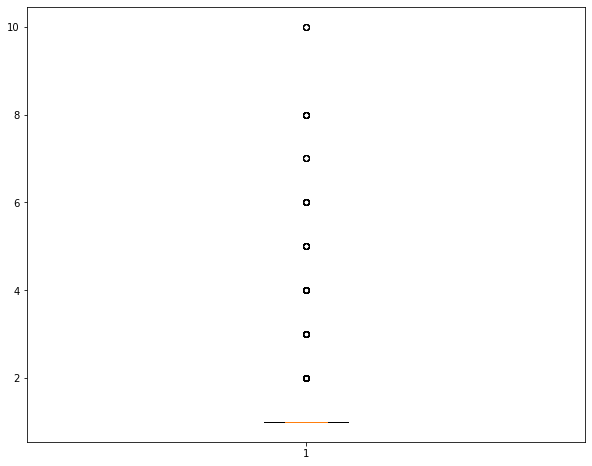

销售量数据异常值个数为： 516
销售量数据异常值的最大值为： 10
销售量数据异常值的最小值为： 2


In [19]:
# 箱线图分析
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
p = plt.boxplot(detail['counts'].values, notch=True)  # 画出箱线图
outlier1 = p['fliers'][0].get_ydata()  # fliers为异常值的标签
plt.savefig('C:/Users/thsm9/Desktop/菜品异常数据识别.png')
plt.show()
print('销售量数据异常值个数为：', len(outlier1))
print('销售量数据异常值的最大值为：', max(outlier1))
print('销售量数据异常值的最小值为：', min(outlier1))


#### 3、标准化数据

* 离差标准化数据
+ 标准差标准化数据
- 小数定标标准化数据

离差标准化数据：$X^*= \frac{X-min}{max-min}$

In [20]:
# 自定义离差标准化函数
def MinMaxScale(data):
    data = (data-data.min())/(data.max()-data.min())
    return data


# 对菜品订单表售价和销量做离差标准化
data1 = MinMaxScale(detail['counts'])
data2 = MinMaxScale(detail['amounts'])
data3 = pd.concat([data1, data2], axis=1)
print('离差标准化之前销量和售价数据为：\n',
      detail[['counts', 'amounts']].head())
print('离差标准化之后销量和售价数据为：\n', data3.head())


离差标准化之前销量和售价数据为：
            counts  amounts
detail_id                 
2956            1       49
2958            1       48
2961            1       30
2966            1       25
2968            1       13
离差标准化之后销量和售价数据为：
            counts   amounts
detail_id                  
2956          0.0  0.271186
2958          0.0  0.265537
2961          0.0  0.163842
2966          0.0  0.135593
2968          0.0  0.067797


标准差标准化数据：$X^*= \frac{X-\bar{X}}{\delta}$

In [22]:
# 自定义标准差标准化函数
def StandardScaler(data):
    data = (data-data.mean())/data.std()
    return data


# 对菜品订单表售价和销量做标准化
data4 = StandardScaler(detail['counts'])
data5 = StandardScaler(detail['amounts'])
data6 = pd.concat([data4, data5], axis=1)
print('标准差标准化之前销量和售价数据为：\n',
      detail[['counts', 'amounts']].head())
print('标准差标准化之后销量和售价数据为：\n', data6.head())


标准差标准化之前销量和售价数据为：
            counts  amounts
detail_id                 
2956            1       49
2958            1       48
2961            1       30
2966            1       25
2968            1       13
标准差标准化之后销量和售价数据为：
              counts   amounts
detail_id                    
2956      -0.177571  0.116671
2958      -0.177571  0.088751
2961      -0.177571 -0.413826
2966      -0.177571 -0.553431
2968      -0.177571 -0.888482
